In [2]:
%load_ext autoreload
%autoreload 2

# Monkey with the path, so that we can import like rational humans
try:
    import deepseg as ds
except:
    import sys, os
    sys.path.insert(0, os.path.abspath('./../../trace/'))
    
dataset_folder = './../../../datasets/'

In [2]:
import PIL.Image
from cStringIO import StringIO
import IPython.display
import numpy as np
def showarray(a, fmt='png'):
    a = np.uint8(a)
    f = StringIO()
    PIL.Image.fromarray(a).save(f, fmt)
    IPython.display.display(IPython.display.Image(data=f.getvalue()))

In [3]:
import trace.dataset as dset

In [8]:
from trace.dataset import ISBIDataset
from trace.sampling import LocalizationSampler
import tensorflow.contrib.image as tfim

In [138]:
import tensorflow as tf
import math

In [3]:
isbi = ISBIDataset('./isbi/')

In [140]:
sampler = LocalizationSampler(isbi, rotation_aug=True, max_angle=(math.pi / 10), translation_aug=False, max_shift=20)
sess = tf.Session()
sampler.initialize_session_variables(sess)

In [149]:
ref, sec, b_ref, trans = sampler.sample(sess)
trans

array([ 0.98144668, -0.19173537,  0.        ,  0.19173537,  0.98144668,
        0.        ,  0.        ,  0.        ], dtype=float32)

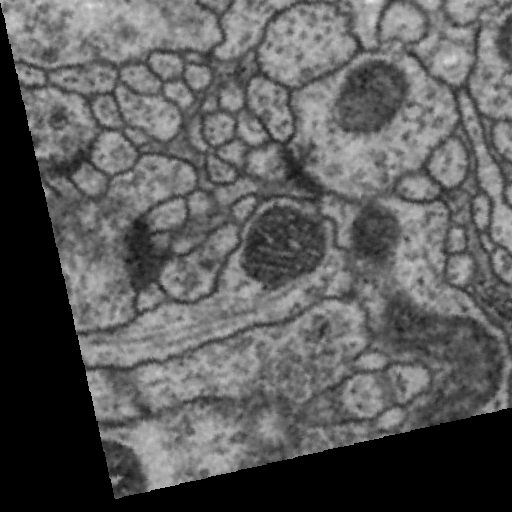

In [155]:
showarray(np.squeeze(b_ref))

In [70]:
trans

array([ 1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.], dtype=float32)

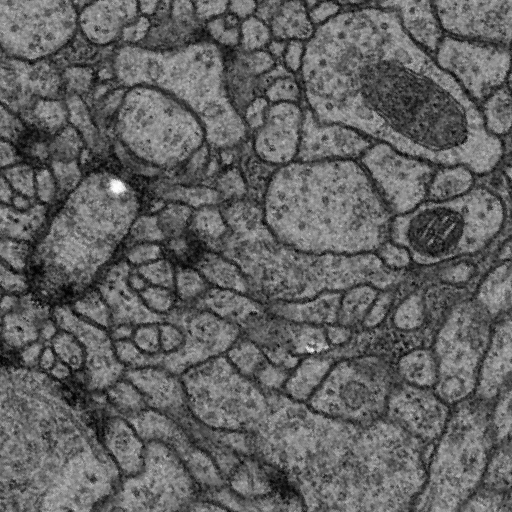

In [71]:
showarray(np.squeeze(sec))

In [67]:
np.amax(ref)

0.0

In [5]:
import trace as ds

In [5]:
import trace.models

ImportError: No module named utils

In [1]:
import em_dataset as emd
import models.conv_net as conv

/usr/people/beisner/.local/lib/python2.7/site-packages/pkg_resources/__init__.py:1299: UserWarning: /usr/people/beisner/.cache/Python-Eggs is writable by group/others and vulnerable to attack when used with get_resource_filename. Consider a more secure location (set with .set_extraction_path or the PYTHON_EGG_CACHE environment variable).
  warnings.warn(msg, UserWarning)


In [110]:
x=3
x + 1

4

In [3]:
conv.N4.print_arch()

n4
Layer 1,	type: conv2d,	filter: [4, 4],	FOV: 4
Layer 2,	type: pool,	filter: [2, 2],	FOV: 5
Layer 3,	type: conv2d,	filter: [5, 5],	FOV: 13
Layer 4,	type: pool,	filter: [2, 2],	FOV: 15
Layer 5,	type: conv2d,	filter: [4, 4],	FOV: 27
Layer 6,	type: pool,	filter: [2, 2],	FOV: 31
Layer 7,	type: conv2d,	filter: [4, 4],	FOV: 55
Layer 8,	type: pool,	filter: [2, 2],	FOV: 63
Layer 9,	type: conv2d,	filter: [3, 3],	FOV: 95
Layer 10,	type: conv2d,	filter: [1, 1],	FOV: 95


In [8]:
cnet = conv.ConvNet(conv.VD2D_BOUNDARIES, is_training=True)

(?, ?, ?, ?, 1)
(?, ?, ?, ?, ?)


In [1]:
import numpy as np
import scipy.stats as st

def gkern(kernlen=21, nsig=3):
    """Returns a 2D Gaussian kernel array."""

    interval = (2*nsig+1.)/(kernlen)
    x = np.linspace(-nsig-interval/2., nsig+interval/2., kernlen+1)
    kern1d = np.diff(st.norm.cdf(x))
    kernel_raw = np.sqrt(np.outer(kern1d, kern1d))
    kernel = kernel_raw/kernel_raw.sum()
    return kernel

In [2]:
import PIL.Image
from cStringIO import StringIO
import IPython.display
import numpy as np
def showarray(a, fmt='png'):
    a = np.uint8(a)
    f = StringIO()
    PIL.Image.fromarray(a).save(f, fmt)
    IPython.display.display(IPython.display.Image(data=f.getvalue()))

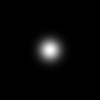

In [40]:
kern = gkern(100, nsig=10)
showarray(kern/np.amax(kern) * 255)

In [50]:
np.amax(kern1)

0.077389135022081126

In [57]:
kern1 = gkern(11, 5)
normed = kern1/np.amax(kern1)
for i in range(len(normed)):
    print(' '.join(["%.4f" % j for j in normed[i].tolist()]))

0.0000 0.0001 0.0004 0.0012 0.0024 0.0030 0.0024 0.0012 0.0004 0.0001 0.0000
0.0001 0.0006 0.0031 0.0097 0.0194 0.0245 0.0194 0.0097 0.0031 0.0006 0.0001
0.0004 0.0031 0.0156 0.0497 0.0993 0.1249 0.0993 0.0497 0.0156 0.0031 0.0004
0.0012 0.0097 0.0497 0.1582 0.3161 0.3978 0.3161 0.1582 0.0497 0.0097 0.0012
0.0024 0.0194 0.0993 0.3161 0.6313 0.7945 0.6313 0.3161 0.0993 0.0194 0.0024
0.0030 0.0245 0.1249 0.3978 0.7945 1.0000 0.7945 0.3978 0.1249 0.0245 0.0030
0.0024 0.0194 0.0993 0.3161 0.6313 0.7945 0.6313 0.3161 0.0993 0.0194 0.0024
0.0012 0.0097 0.0497 0.1582 0.3161 0.3978 0.3161 0.1582 0.0497 0.0097 0.0012
0.0004 0.0031 0.0156 0.0497 0.0993 0.1249 0.0993 0.0497 0.0156 0.0031 0.0004
0.0001 0.0006 0.0031 0.0097 0.0194 0.0245 0.0194 0.0097 0.0031 0.0006 0.0001
0.0000 0.0001 0.0004 0.0012 0.0024 0.0030 0.0024 0.0012 0.0004 0.0001 0.0000


In [58]:
import tifffile

In [59]:
ims = tifffile.imread('./isbi/train-input.tif')

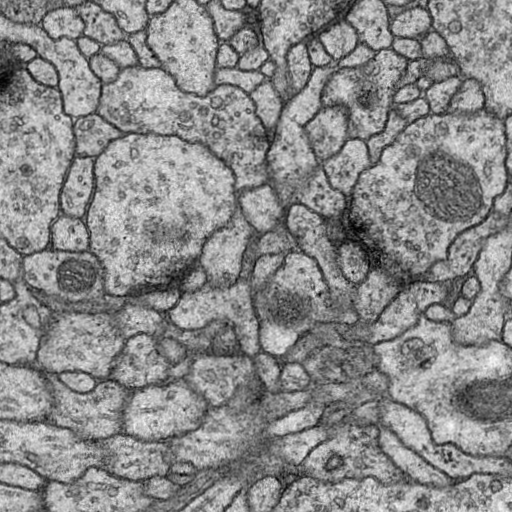

In [60]:
showarray(ims[0])

In [61]:
import tensorflow as tf

In [137]:
shallow_kernel = np.reshape(gkern(10, 10), [10, 10, 1, 1])
wide_kernel = np.reshape(gkern(10, 2), [10, 10, 1, 1])
image = np.expand_dims(np.expand_dims(np.asarray(ims[0], dtype=np.float32), axis=0), axis=3)

# Compute a normalized kernel
norm_shallow_kernel = shallow_kernel / np.sum(shallow_kernel)
norm_wide_kernel = wide_kernel / np.sum(wide_kernel)

# Smooth the image
shallow_img = tf.nn.conv2d(image, norm_shallow_kernel, strides=[1,1,1,1], padding='SAME')
wide_img = tf.nn.conv2d(image, norm_wide_kernel, strides=[1,1,1,1], padding='SAME')

# Reshape the output image as a kernel
shallow_img_kernel = tf.expand_dims(tf.expand_dims(tf.squeeze(shallow_img), axis=2), axis=3)
wide_img_kernel = tf.expand_dims(tf.expand_dims(tf.squeeze(wide_img), axis=2), axis=3)
orig_img_kernel = np.expand_dims(np.expand_dims(np.asarray(ims[0], dtype=np.float32),axis=2), axis=3)

# Normalize the kernels so that the sum of all elements = 1
trunc_shal = shallow_img_kernel[128:385, 128:385, :, :]
trunc_wide = wide_img_kernel[128:385, 128:385, :, :]
trunc_orig = orig_img_kernel[128:385, 128:385, :, :]

norm_shallow_img_kernel = (trunc_shal / tf.reduce_sum(trunc_shal))
norm_wide_img_kernel = (trunc_wide / tf.reduce_sum(trunc_wide))
norm_orig_img_kernel = (trunc_orig / np.sum(trunc_orig))

# Compute x-correlation by sliding across
shallow_xcor = tf.nn.conv2d(image, norm_shallow_img_kernel, strides=[1,1,1,1], padding='SAME')
wide_xcor = tf.nn.conv2d(image, norm_wide_img_kernel, strides=[1,1,1,1], padding='SAME')
orig_xcor = tf.nn.conv2d(image, norm_orig_img_kernel, strides=[1,1,1,1], padding='SAME')

with tf.Session() as sess:
    shallow, wide, orig = sess.run([shallow_xcor, wide_xcor, orig_xcor])

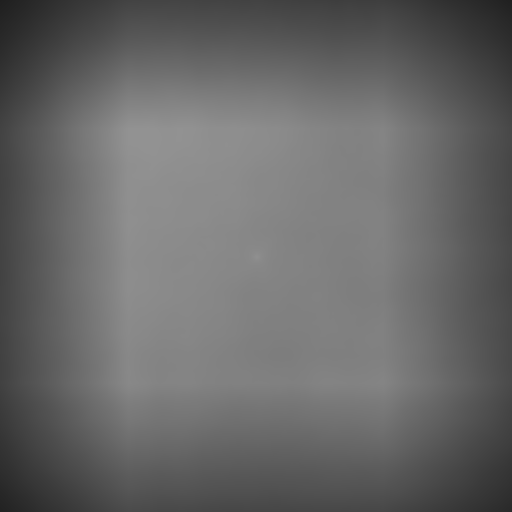

In [138]:
showarray(np.squeeze(shallow))

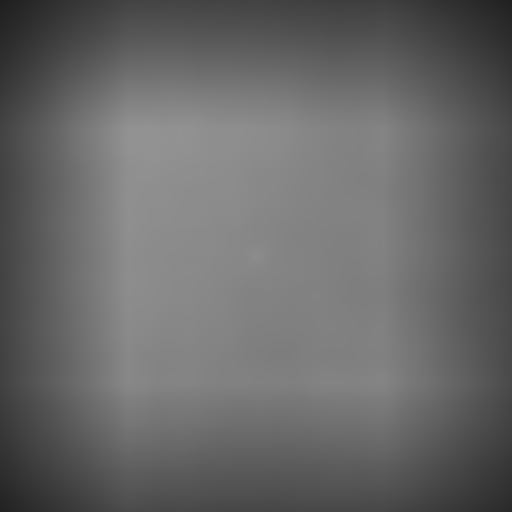

In [139]:
showarray(np.squeeze(wide))

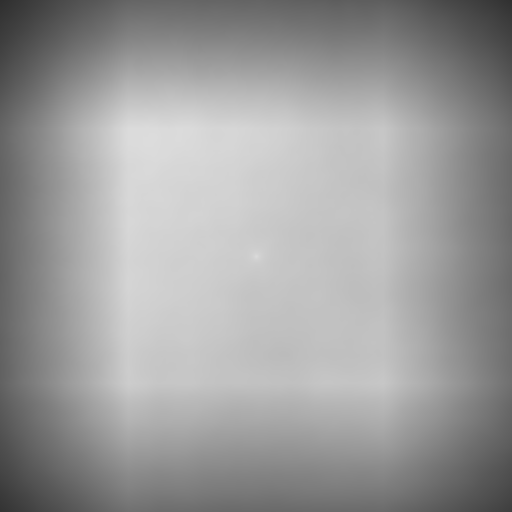

In [145]:
showarray(np.squeeze(orig)*1.5)

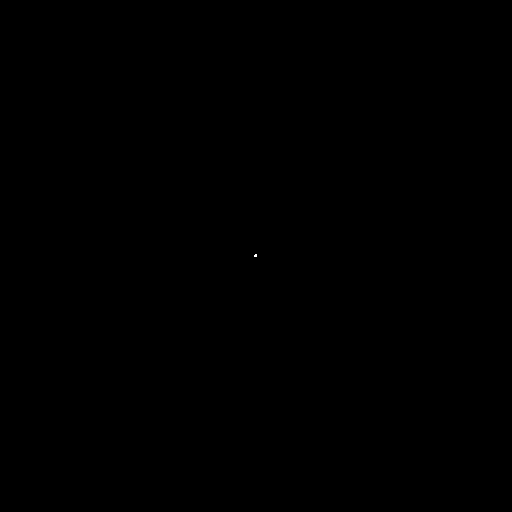

In [143]:
showarray(np.squeeze(shallow-orig))

In [144]:
np.amax(orig)

146.94905

In [154]:
small_patch = (512 - 10) / 2
o_patch = np.squeeze(shallow)[small_patch:small_patch + 10, small_patch:small_patch + 10]

In [155]:
for i in range(len(o_patch)):
    print(' '.join(["%.4f" % j for j in o_patch[i].tolist()]))

137.5019 137.7676 138.0076 138.2154 138.3712 138.4399 138.4115 138.2695 138.0347 137.7350
137.7477 138.1128 138.4741 138.8165 139.0999 139.2498 139.2225 139.0060 138.6513 138.2157
137.9957 138.4711 138.9757 139.4870 139.9436 140.2131 140.1853 139.8515 139.3309 138.7335
138.2345 138.8220 139.4816 140.2070 140.9331 141.4210 141.3965 140.8480 140.0588 139.2494
138.4176 139.1023 139.9133 140.8980 142.0168 142.8568 142.8424 141.9524 140.7682 139.6930
138.4912 139.2335 140.1507 141.3464 142.8094 143.9639 143.9482 142.7401 141.2099 139.9237
138.4217 139.1596 140.0785 141.2783 142.7395 143.8828 143.8523 142.6348 141.1047 139.8223
138.2105 138.8789 139.6874 140.6749 141.7871 142.6087 142.5730 141.6682 140.4821 139.4091
137.8970 138.4545 139.1020 139.8217 140.5368 141.0134 140.9822 140.4259 139.6313 138.8174
137.5314 137.9682 138.4600 138.9668 139.4126 139.6720 139.6405 139.3004 138.7748 138.1758


In [4]:
ds.

ImportError: No module named dataset

In [2]:
import trace.dataset as dset

ImportError: No module named dataset

In [5]:
snem = dset.SNEMI3DDataset(dataset_folder + 'snemi3d/')

In [6]:
np.amax(snem.train_inputs)

255

In [8]:
import pandas

In [39]:
df = pandas.DataFrame(index=['N4 w/o aug', 'N4', 'VD2D', 'VD2D (x5)', 'U-Net'], columns=['Pixel Error', 'Rand - Full', 'Rand - Merge', 'Rand - Split'])

In [40]:
df.loc['N4'] = [10, 10, 10, 10]

In [41]:
df

,Pixel Error,Rand - Full,Rand - Merge,Rand - Split
N4 w/o aug,NaN,NaN,NaN,NaN
N4,10,10,10,10
VD2D,NaN,NaN,NaN,NaN
VD2D (x5),NaN,NaN,NaN,NaN
U-Net,NaN,NaN,NaN,NaN


In [46]:
with open('./../tex/tables/2d_aug_results.tex', 'w') as latex_file:
    latex_file.write(df.to_latex(bold_rows=False))


In [2]:
from common import showarray

In [3]:
import numpy as np

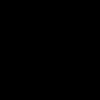

In [4]:
showarray(np.zeros(shape=[100,100]))

In [6]:
import trace.thirdparty.watershed as wshed

In [7]:
import numpy as np

In [10]:
aff = np.zeros(shape=[10, 1023, 1023, 3])

In [11]:
res, mst = wshed.watershed(aff, 0.9, 0.99)

In [2]:
import julia

In [4]:
j = julia.Julia()

In [13]:
mst

[]

In [27]:
import h5py
fil = h5py.File('./../../../datasets/snemi3d/train-affinities.h5', 'r')
data = fil['main'][:]

IOError: Unable to open file (Unable to open file: name = './../../../datasets/snemi3d/train-affinities.h5', errno = 2, error message = 'no such file or directory', flags = 0, o_flags = 0)

In [18]:
reshaped = np.einsum('abcd->bcda', data)

In [19]:
reshaped.shape

(22, 512, 512, 3)

In [20]:
res, mst = wshed.watershed(reshaped, 0.9, 0.9995)

In [23]:
from common import showarray

In [24]:
res.shape

(22, 512, 512)

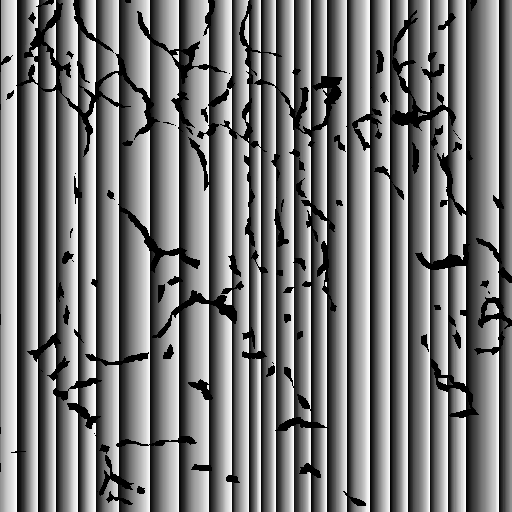

In [26]:
showarray(res[10])

In [3]:
import trace.models as mod

In [32]:
mod.VD2D_3D.z_fov

7

In [5]:
mod.UNET_3D_4LAYERS.z_fov

1